In [1]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
qiskit.__qiskit_version__

{'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-aqua': '0.6.0',
 'qiskit-ibmq-provider': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-terra': '0.9.0'}

In [4]:
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# A Quantum Cirtuit to calculate 1+1
https://quantum-computing.ibm.com/support/guides/introduction-to-quantum-circuits?section=5cae613866c1694be21df8cc#

In [193]:
circ = QuantumCircuit(4, 1, name='Adder')

In [194]:
circ.x(0)
circ.x(1)
circ.barrier()
circ.cx(1, 2)
circ.cx(0, 2)
circ.cx(0, 3)
circ.cx(1, 3)
circ.barrier()
circ.measure(2, 0)
circ.measure(3, 0)

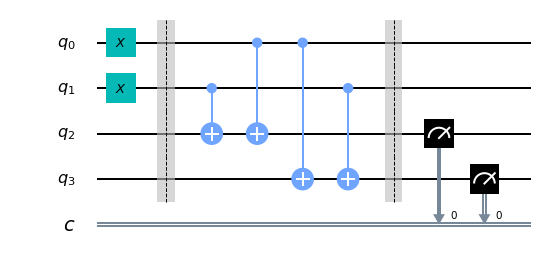

In [195]:
circ.draw(output='mpl')

In [197]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [198]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

In [199]:
result = job.result()

In [200]:
outputstate = result.get_statevector(circ, decimals=3)

In [201]:
print(outputstate)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


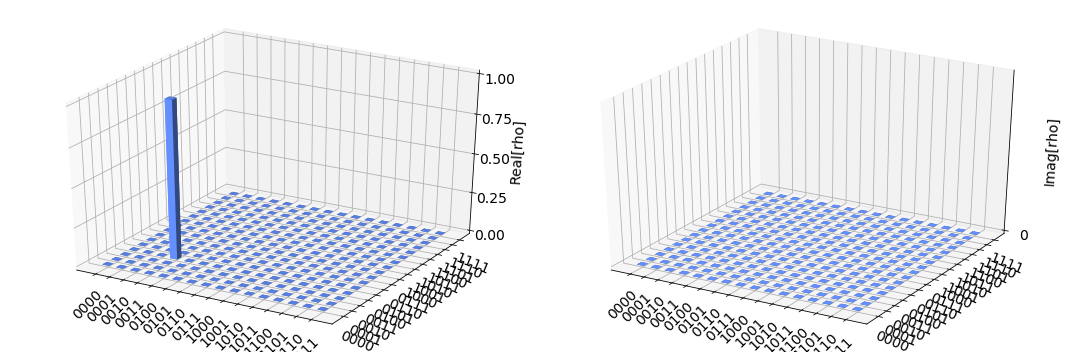

In [202]:
visualization.plot_state_city(outputstate)

# 2-Qubit Quantum Perceptron
https://arxiv.org/pdf/1811.02266.pdf

https://github.com/fvalle1/quantumPerceptron

In [203]:
qperp = QuantumCircuit(2, 2)

In [204]:
qperp.h(0)
qperp.h(1)
qperp.s(0)
qperp.s(1)
qperp.h(1)
qperp.cx(0, 1)
qperp.h(1)
qperp.barrier()
qperp.s(0)
qperp.s(1)
qperp.h(0)
qperp.h(1)
qperp.x(0)
qperp.x(1)
qperp.h(1)
qperp.cx(0, 1)
qperp.h(1)
qperp.barrier()
qperp.x(0)
qperp.x(1)
qperp.h(0)
qperp.h(1)
qperp.measure(0, 0)
qperp.measure(1, 1)

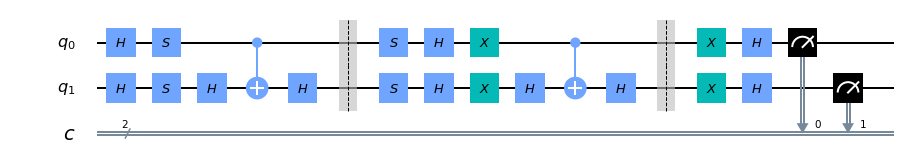

In [205]:
qperp.draw(output='mpl')

In [206]:
job = execute(qperp, backend, shots=2)

In [207]:
result = job.result()

In [208]:
outputstate = result.get_statevector(qperp, decimals=3)

In [209]:
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [210]:
# visualization.iplot_state_city(outputstate)

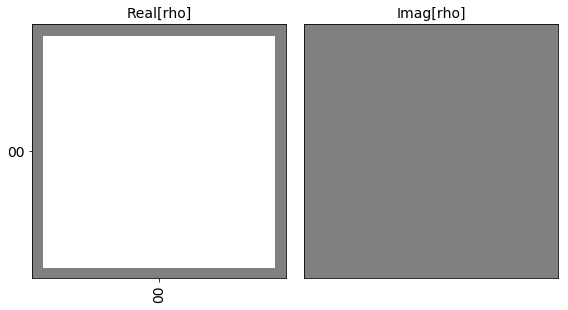

In [211]:
visualization.plot_state_hinton(outputstate)

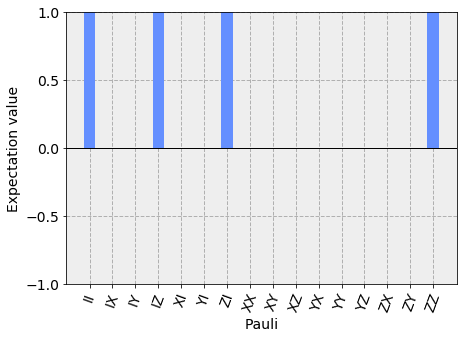

In [212]:
visualization.plot_state_paulivec(outputstate)

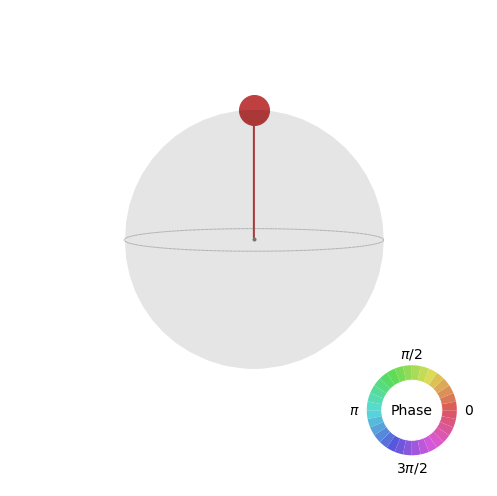

In [213]:
visualization.plot_state_qsphere(outputstate)

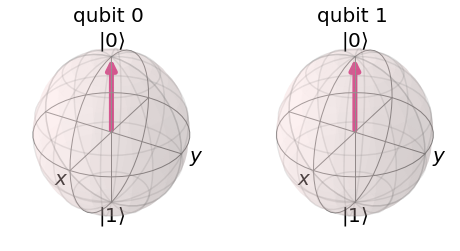

In [214]:
visualization.plot_bloch_multivector(outputstate)

# 4-Qubit Quantum Perceptron
https://arxiv.org/pdf/1811.02266.pdf

In [179]:
qreg = QuantumRegister(5)
fqperp = QuantumCircuit(qreg)

In [180]:
for i in range(4):
    fqperp.h(qreg[i])
    
for i in range(3):
    fqperp.z(qreg[i])
    
fqperp.cz(qreg[1], qreg[2])
fqperp.cz(qreg[0], qreg[2])
fqperp.cz(qreg[0], qreg[1])
fqperp.mcrz(q_controls=[qreg[0], qreg[1]], q_target=qreg[2], lam=np.pi/2)

fqperp.barrier()

for i in range(1, 3):
    fqperp.z(qreg[i])

fqperp.cz(qreg[1], qreg[3])
fqperp.cz(qreg[0], qreg[2])
fqperp.cz(qreg[0], qreg[1])
fqperp.mcrz(q_controls=[qreg[1], qreg[2]], q_target=qreg[3], lam=np.pi/2)
fqperp.mcrz(q_controls=[qreg[0], qreg[1]], q_target=qreg[3], lam=np.pi/2)
fqperp.mcrz(q_controls=[qreg[0], qreg[1], qreg[2]], q_target=qreg[3], lam=np.pi/2)

fqperp.barrier()

for i in range(4):
    fqperp.h(qreg[i])
    fqperp.x(qreg[i])
    
fqperp.barrier()

fqperp.mcrx(q_controls=[qreg[0], qreg[1], qreg[2], qreg[3]], q_target=qreg[4], theta=np.pi/2)

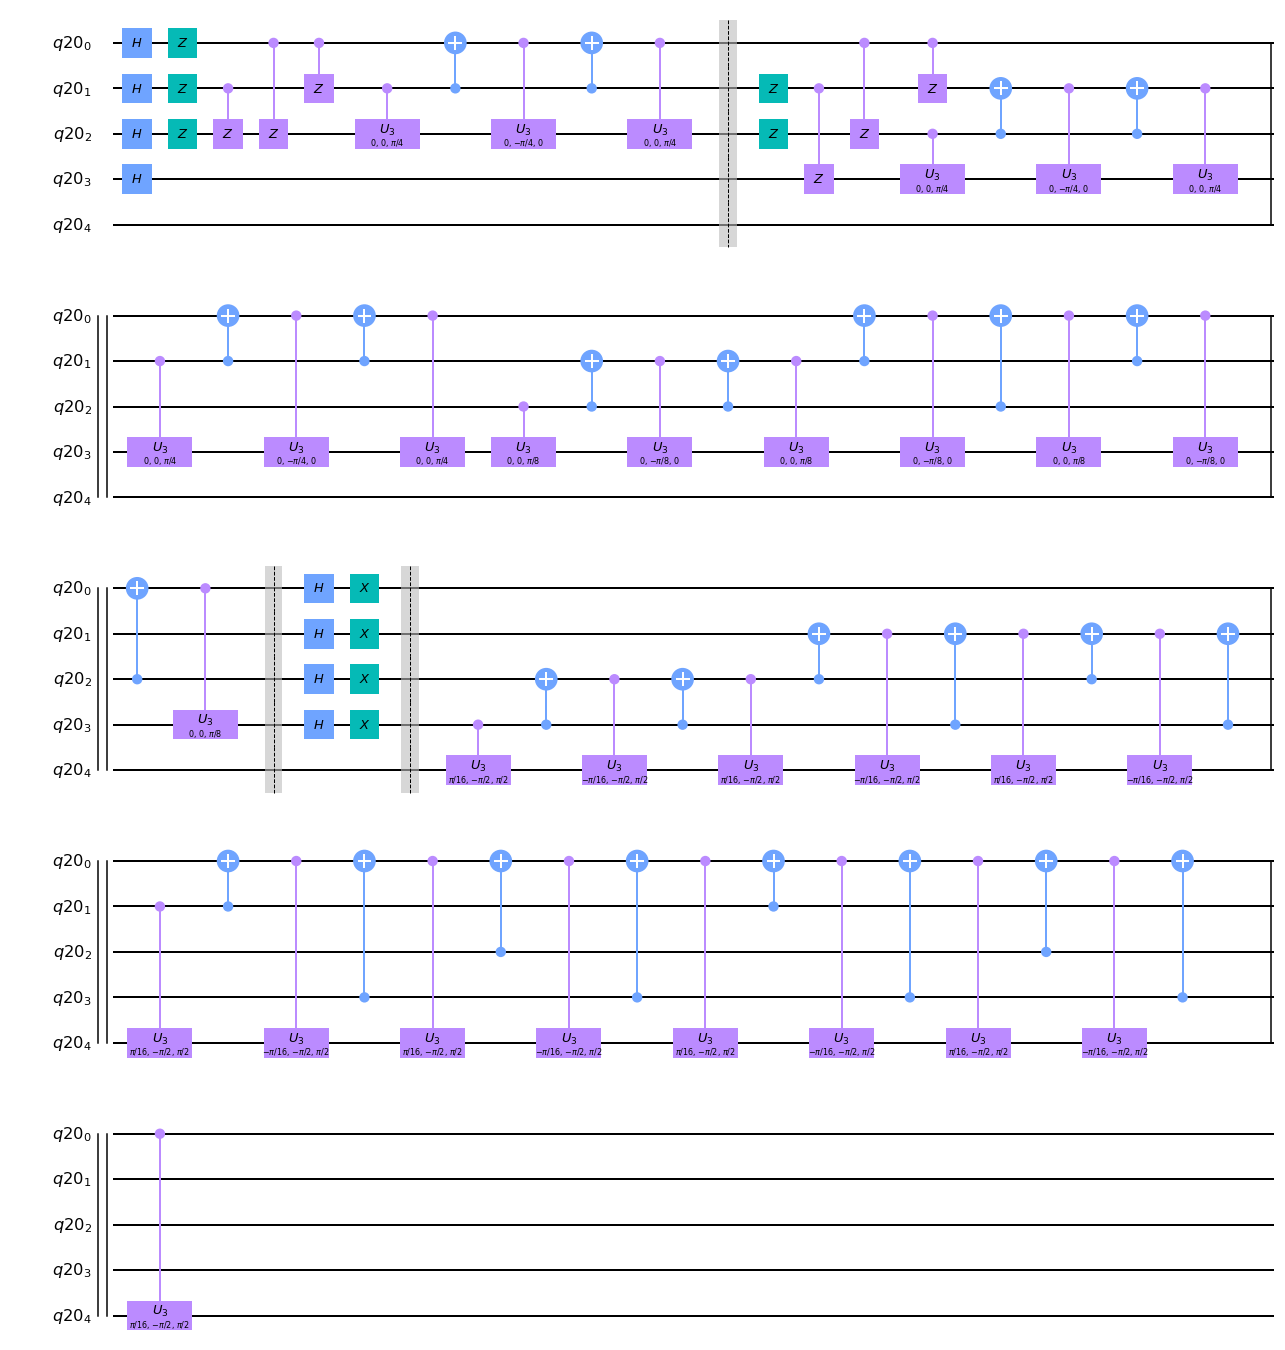

In [181]:
fqperp.draw(output='mpl')

In [183]:
job = execute(fqperp, backend, shots=4096)
result = job.result()
outputstate = result.get_statevector(fqperp, decimals=3)
print(outputstate)

[-0.312-0.188j -0.062+0.063j  0.312+0.188j  0.062-0.062j -0.062+0.062j
 -0.062+0.062j  0.063-0.062j  0.062-0.062j -0.063+0.062j -0.062+0.063j
  0.063-0.062j  0.063-0.063j  0.437+0.062j  0.188-0.188j  0.563-0.063j
 -0.133+0.133j  0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  0.   +0.j     0.133+0.133j]


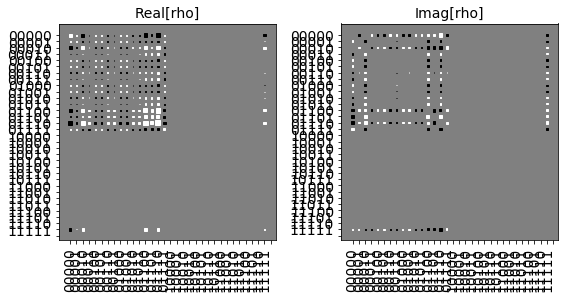

In [186]:
visualization.plot_state_hinton(outputstate)

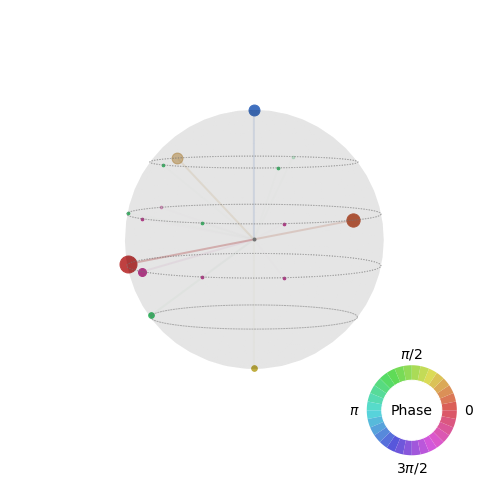

In [189]:
visualization.plot_state_qsphere(outputstate)

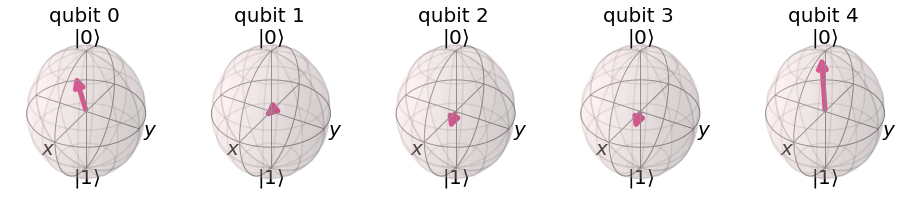

In [192]:
visualization.plot_bloch_multivector(outputstate)